### Classification

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.3.0'

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
data=load_breast_cancer()

In [6]:
type(data)

sklearn.utils.Bunch

In [7]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [8]:
data['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [15]:
data.target.shape

(569,)

In [20]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [21]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [25]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [27]:
data.filename

'C:\\Users\\bnarapar\\Anaconda3\\envs\\tf\\lib\\site-packages\\sklearn\\datasets\\data\\breast_cancer.csv'

In [30]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.data,data.target,test_size=0.3)

In [33]:
x_train.shape

(398, 30)

In [34]:
n, d = x_train.shape

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(d,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

print('Train Score:',model.evaluate(x_train,y_train))
print('Test Score:',model.evaluate(x_test,y_test))

Epoch 1/100
13/13 [==============================] - 0s 34ms/step - loss: 1.7956 - accuracy: 0.1030 - val_loss: 1.6737 - val_accuracy: 0.1345
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 1.6413 - accuracy: 0.1055 - val_loss: 1.5290 - val_accuracy: 0.1345
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 1.4942 - accuracy: 0.1131 - val_loss: 1.3916 - val_accuracy: 0.1462
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 1.3531 - accuracy: 0.1307 - val_loss: 1.2614 - val_accuracy: 0.1579
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 1.2208 - accuracy: 0.1457 - val_loss: 1.1402 - val_accuracy: 0.1754
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 1.1003 - accuracy: 0.1709 - val_loss: 1.0284 - val_accuracy: 0.1988
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9893 - accuracy: 0.2186 - val_loss: 0.9286 - val_accuracy: 0.2456
Epoch 8/100


Epoch 59/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1676 - accuracy: 0.9598 - val_loss: 0.1630 - val_accuracy: 0.9474
Epoch 60/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1657 - accuracy: 0.9598 - val_loss: 0.1612 - val_accuracy: 0.9474
Epoch 61/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1640 - accuracy: 0.9598 - val_loss: 0.1594 - val_accuracy: 0.9474
Epoch 62/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1623 - accuracy: 0.9623 - val_loss: 0.1576 - val_accuracy: 0.9474
Epoch 63/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1606 - accuracy: 0.9623 - val_loss: 0.1560 - val_accuracy: 0.9474
Epoch 64/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1590 - accuracy: 0.9648 - val_loss: 0.1543 - val_accuracy: 0.9474
Epoch 65/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1575 - accuracy: 0.9648 - val_loss: 0.1527 - val_accuracy: 0.9532
Epoch 

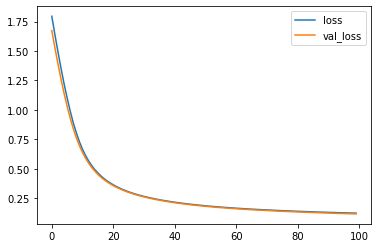

In [38]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [41]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

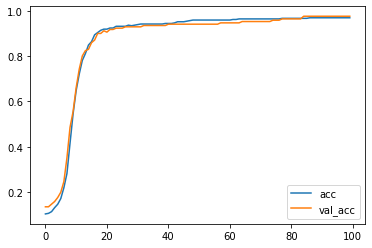

In [42]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()